In [1]:
import os
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import gmean

In [2]:
base_dir = "../logs/GAP/"
# Define trace names and configuration labels
trace_names = ['bc-5', 'bfs-8', 'cc-5', 'pr-5', 'sssp-5']
configs = ['baseline', 'ipcp', 'ipcp-l1-l2', 'ipcp-isb','isb-L1-degree-8', 'isb-degree-8']
fields = ['L1D LOAD      ACCESS', 'L2C LOAD      ACCESS', 'LLC LOAD      ACCESS']
# Initialize a dictionary to store IPC values for each trace and configuration
mpki_values = {trace: {field: {} for field in fields } for trace in trace_names}

mpki_values


{'bc-5': {'L1D LOAD      ACCESS': {},
  'L2C LOAD      ACCESS': {},
  'LLC LOAD      ACCESS': {}},
 'bfs-8': {'L1D LOAD      ACCESS': {},
  'L2C LOAD      ACCESS': {},
  'LLC LOAD      ACCESS': {}},
 'cc-5': {'L1D LOAD      ACCESS': {},
  'L2C LOAD      ACCESS': {},
  'LLC LOAD      ACCESS': {}},
 'pr-5': {'L1D LOAD      ACCESS': {},
  'L2C LOAD      ACCESS': {},
  'LLC LOAD      ACCESS': {}},
 'sssp-5': {'L1D LOAD      ACCESS': {},
  'L2C LOAD      ACCESS': {},
  'LLC LOAD      ACCESS': {}}}

In [3]:
def extract_mpki(field, log_file):
    with open(log_file, 'r') as f:
        for line in f:
            if field in line:
                mpki_value = float(re.search(r"MPKI:\s([\d\.]+)", line).group(1))
                return mpki_value
    return None

# Parse the IPC values from the log files
for trace in trace_names:
    for field in fields:
        for config in configs:
            log_file = base_dir + f"{trace}-{config}.log"
            mpki_values[trace][field][config] = extract_mpki(field, log_file)
# Calculate geometric mean for each configuration (excluding baseline)
geomeans = {field: {} for field in fields}
for config in configs:
    for field in fields:
        config_mpki = [mpki_values[trace][field][config] for trace in trace_names]
        geomeans[field][config] = gmean(config_mpki)  # Use scipy's gmean for geometric mean

mpki_values['Geomean'] = geomeans
trace_names += ['Geomean']
mpki_values

{'bc-5': {'L1D LOAD      ACCESS': {'baseline': 82.4602,
   'ipcp': 78.2951,
   'ipcp-l1-l2': 78.2887,
   'ipcp-isb': 74.9659,
   'isb-L1-degree-8': 76.0564,
   'isb-degree-8': 82.4601},
  'L2C LOAD      ACCESS': {'baseline': 73.7873,
   'ipcp': 71.8924,
   'ipcp-l1-l2': 71.7617,
   'ipcp-isb': 69.0706,
   'isb-L1-degree-8': 69.9171,
   'isb-degree-8': 70.1288},
  'LLC LOAD      ACCESS': {'baseline': 46.4334,
   'ipcp': 50.3156,
   'ipcp-l1-l2': 50.1927,
   'ipcp-isb': 49.2544,
   'isb-L1-degree-8': 47.3776,
   'isb-degree-8': 47.3069}},
 'bfs-8': {'L1D LOAD      ACCESS': {'baseline': 21.043,
   'ipcp': 9.87035,
   'ipcp-l1-l2': 9.83219,
   'ipcp-isb': 11.5329,
   'isb-L1-degree-8': 10.5499,
   'isb-degree-8': 21.0432},
  'L2C LOAD      ACCESS': {'baseline': 15.8476,
   'ipcp': 4.3035,
   'ipcp-l1-l2': 4.20288,
   'ipcp-isb': 5.69664,
   'isb-L1-degree-8': 4.96895,
   'isb-degree-8': 5.03926},
  'LLC LOAD      ACCESS': {'baseline': 15.1484,
   'ipcp': 3.88081,
   'ipcp-l1-l2': 3.77248,


In [4]:
def plot_mpki(field):
    x = np.arange(len(trace_names))  # X axis positions for the traces
    width = 0.12  # Width of the bars

    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot bars for each configuration
    for i, config in enumerate(configs):  # Skip baseline
        _mpki_values = [mpki_values[trace][field][config] for trace in trace_names]
        bars = ax.bar(x + i*width, _mpki_values, width, label=config)

        # Annotate bars with speedup values
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',  # Format the annotation to 2 decimal places
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # Offset text slightly above the bar
                        textcoords="offset points",
                        ha='center', va='bottom',rotation=90)


    # Add labels and titles
    ax.set_xlabel('Trace')
    ax.set_ylabel('MPKI')
    ax.set_ylim(0, 200)
    ax.set_title(f"{field[:8]} MPKI")
    ax.set_xticks(x + 5*width / 2)
    ax.set_xticklabels(trace_names, rotation=15)
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

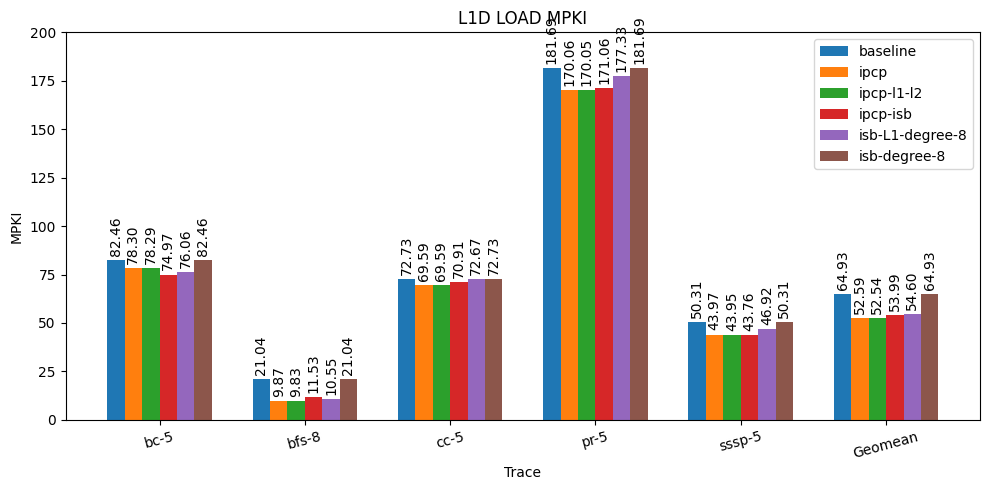

In [5]:
plot_mpki(fields[0])

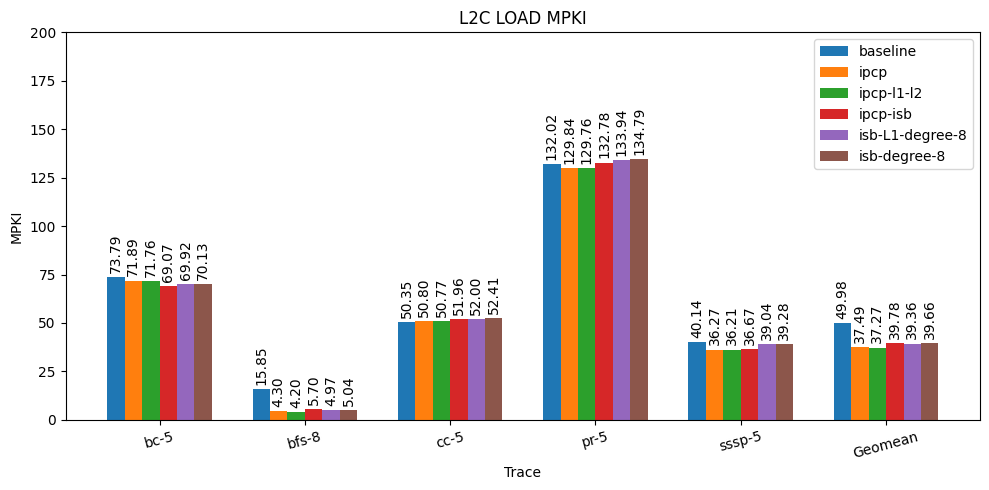

In [6]:
plot_mpki(fields[1])

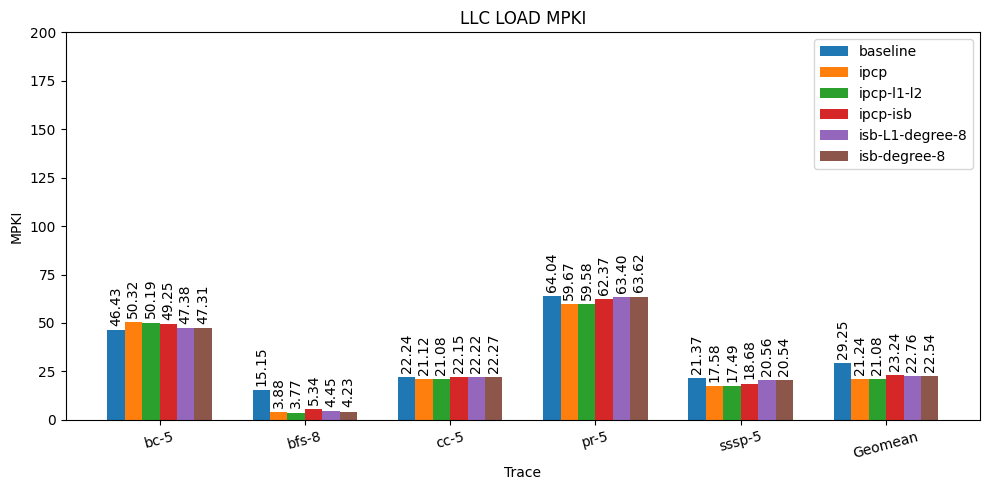

In [7]:
plot_mpki(fields[2])